In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.io as pio
#pio.renderers.default = 'browser'
!pip install plotly
import plotly.express as px
import geopandas as gpd

In [518]:
data = pd.read_csv(r"/Users/sujithasunkara/Documents/Kaggle/Covid _19 in India/covid_19_india.csv")

In [582]:
data.columns
data.shape
data.head()
#print(type(data))
#print(data['State/UnionTerritory']== "Maharashtra***")

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [520]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

<AxesSubplot:>

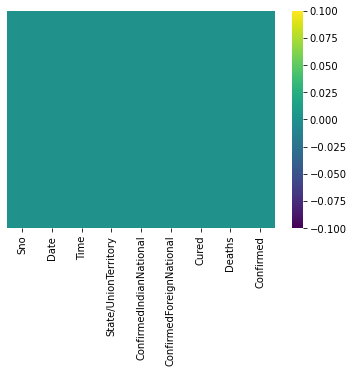

In [521]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = True, cmap ="viridis")

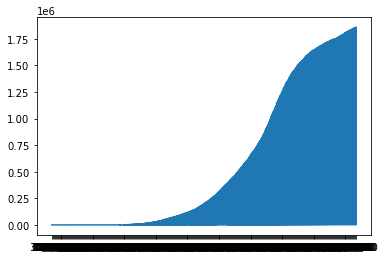

In [522]:
plt.plot( "Date", "Confirmed", data = data)

<AxesSubplot:xlabel='Confirmed', ylabel='State/UnionTerritory'>

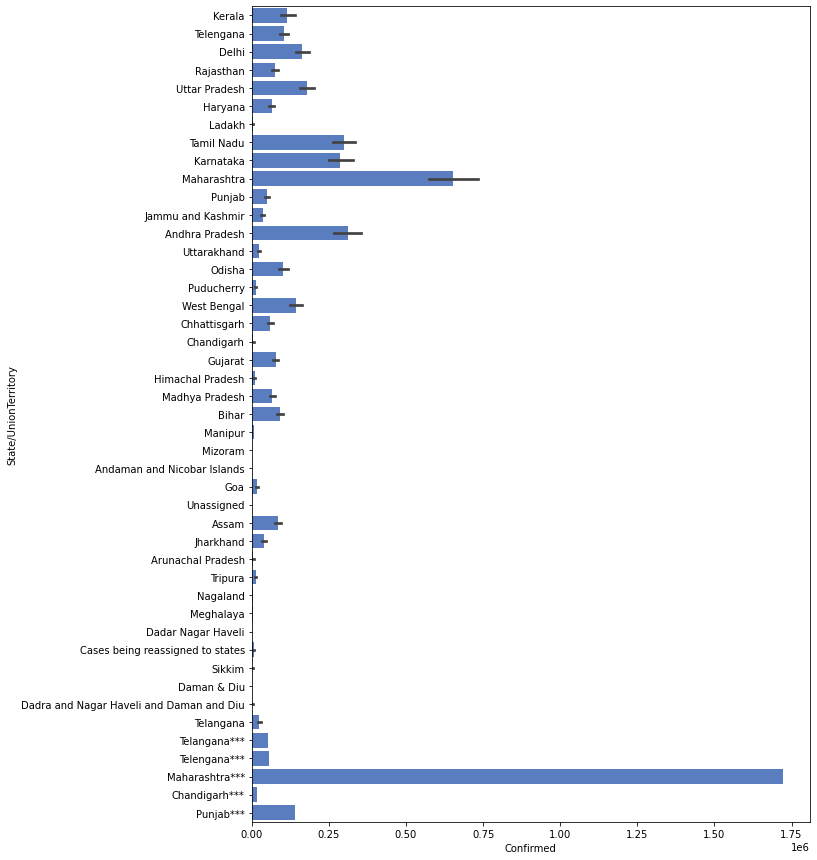

In [523]:
plt.figure(figsize=(10,15))
sns.barplot(x = "Confirmed", y= "State/UnionTerritory", data = data , label = "confirmed", color ="b")


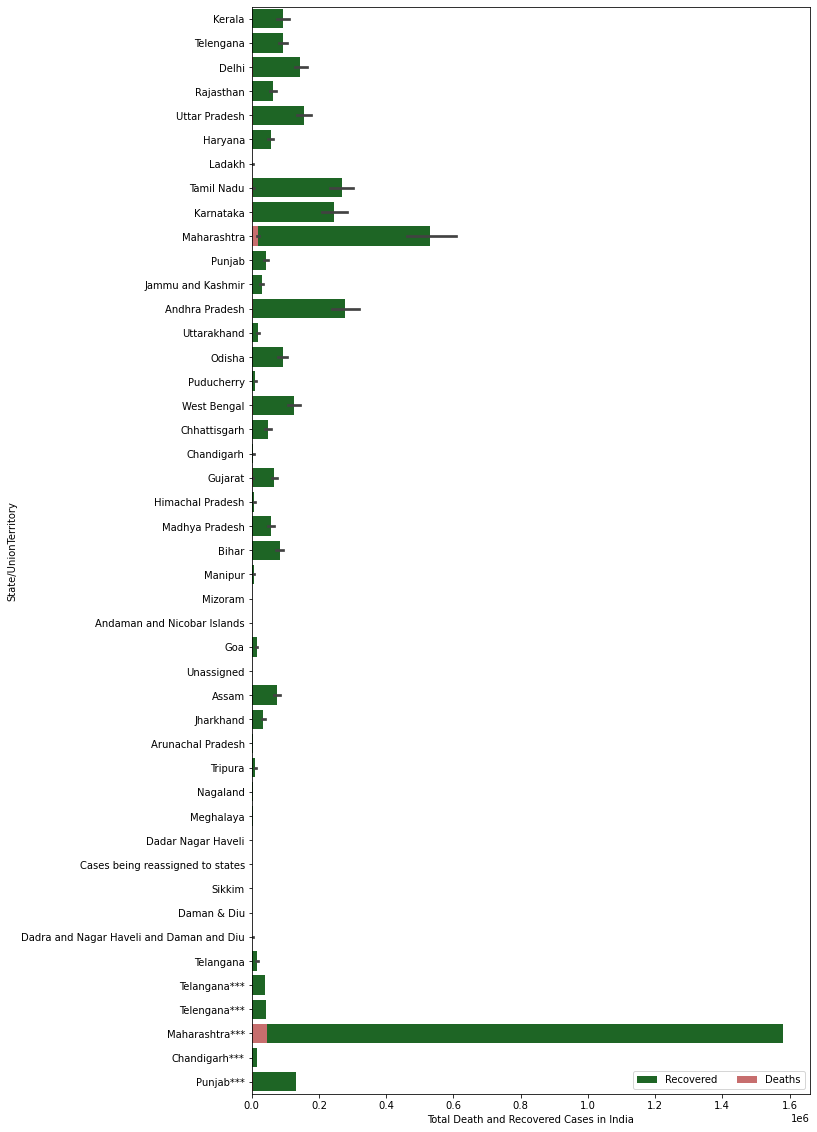

In [524]:
f, ax = plt.subplots(figsize=(10, 20))
sns.set_color_codes("dark")
sns.barplot(x = "Cured", y= "State/UnionTerritory", data = data , label = "Recovered", color ="g")
# Deaths
sns.set_color_codes("muted")
sns.barplot(x = "Deaths", y = "State/UnionTerritory", data= data, label = "Deaths", color ="r")

ax.set(xlabel='Total Death and Recovered Cases in India')
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)


In [624]:
print(type(data['State/UnionTerritory']))

<class 'pandas.core.series.Series'>


In [525]:
x = data['Confirmed'].sum()
y = data['Cured'].sum()
z= data['Deaths'].sum()
active= x-y
print('Total Confirmed cases =',x)
print('Total Cured cases =',y)
print('Total Active cases =',active)
print('Total Death cases =',z)

Total Confirmed cases = 853283429
Total Cured cases = 730576046
Total Active cases = 122707383
Total Death cases = 13821481


<AxesSubplot:>

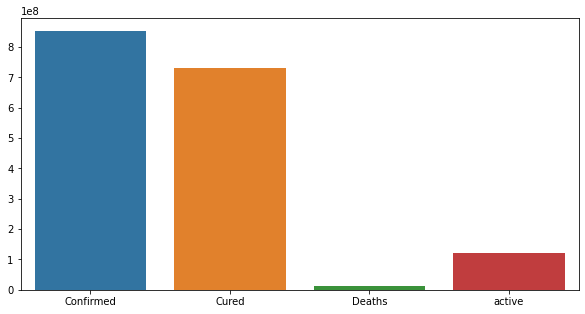

In [526]:
plt.figure(figsize=(10,5))
sns.barplot(x=['Confirmed','Cured','Deaths','active'],y=[x,y,z,active])

In [573]:
geodata = gpd.read_file("/Users/sujithasunkara/Documents/Kaggle/Covid _19 in India/india.geojson")

In [528]:
geodata.head()

,ID_0,ID_1,ISO,NAME_0,NAME_1,FID,geometry
0,105,1,IND,India,Andaman and Nicobar,0.0,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,36,IND,India,Telangana,0.0,"MULTIPOLYGON (((77.50945 15.92086, 77.51458 15..."
2,105,2,IND,India,Andhra Pradesh,0.0,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
3,105,3,IND,India,Arunachal Pradesh,0.0,"MULTIPOLYGON (((95.23763 26.68629, 95.23598 26..."
4,105,4,IND,India,Assam,0.0,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."


<AxesSubplot:>

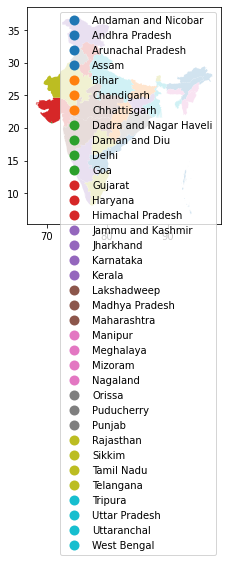

In [622]:
geodata.plot(column= 'NAME_1', legend = True )

In [545]:
                                                     
data.replace("Maharashtra***","Maharashtra", inplace = True)
data.replace("Chandigarh***","Chandigarh", inplace = True)
data.replace("Dadra and Nagar Haveli and Daman and Diu","Daman & Diu", inplace = True)
data.replace("Punjab***","Punjab", inplace = True)
data.replace("Telangana***","Telengana", inplace = True)
data.replace("Telengana***","Telengana", inplace = True)
data.replace("Telangana","Telengana", inplace = True)
print(data['State/UnionTerritory'].unique())
#data =data_state.drop([5,21,41])

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu']


In [532]:
for items in data['State/UnionTerritory'].to_list():
    geodata_list = geodata['NAME_1'].to_list()
    if items in geodata_list:
        pass
    else:
        print(items+"is not in geodata list")

Unassignedis not in geodata list
Unassignedis not in geodata list
Unassignedis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigned to statesis not in geodata list
Cases being reassigne

In [546]:
geodata.replace("Andaman and Nicobar", "Andaman and Nicobar Islands", inplace = True)
geodata.replace("Dadra and Nagar Haveli","Dadar Nagar Haveli", inplace = True)
geodata.replace("Daman and Diu","Daman & Diu", inplace = True)
geodata.replace("Orissa","Odisha", inplace = True)
geodata.replace("Telangana","Telengana", inplace = True)
geodata.replace("Uttaranchal","Uttarakhand", inplace = True)
geodata.replace("Lakshadweep","Ladakh", inplace = True)

In [547]:
data_state= data.groupby("State/UnionTerritory")["Confirmed"].sum()

In [548]:
data_state= data_state.to_frame()


In [549]:
data_state = data_state.reset_index()

In [550]:
print(data_state)

                State/UnionTerritory  Confirmed
0        Andaman and Nicobar Islands     483761
1                     Andhra Pradesh   84815303
2                  Arunachal Pradesh    1314087
3                              Assam   21703581
4                              Bihar   23891385
5   Cases being reassigned to states     345565
6                         Chandigarh    1403514
7                       Chhattisgarh   16051609
8                 Dadar Nagar Haveli        186
9                        Daman & Diu     384620
10                             Delhi   46445978
11                               Goa    4248741
12                           Gujarat   20788858
13                           Haryana   18060806
14                  Himachal Pradesh    2354421
15                 Jammu and Kashmir    9870504
16                         Jharkhand    9912089
17                         Karnataka   79354749
18                            Kerala   36407056
19                            Ladakh    

In [551]:
data_state.drop([5,34])

,State/UnionTerritory,Confirmed
0,Andaman and Nicobar Islands,483761
1,Andhra Pradesh,84815303
2,Arunachal Pradesh,1314087
3,Assam,21703581
4,Bihar,23891385
6,Chandigarh,1403514
7,Chhattisgarh,16051609
8,Dadar Nagar Haveli,186
9,Daman & Diu,384620
10,Delhi,46445978


In [552]:
data_state['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadar Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [553]:
print(geodata.head())
print(data_state.head())

   ID_0  ID_1  ISO NAME_0                       NAME_1  FID  \
0   105     1  IND  India  Andaman and Nicobar Islands  0.0   
1   105    36  IND  India                    Telengana  0.0   
2   105     2  IND  India               Andhra Pradesh  0.0   
3   105     3  IND  India            Arunachal Pradesh  0.0   
4   105     4  IND  India                        Assam  0.0   

                                            geometry  
0  MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
1  MULTIPOLYGON (((77.50945 15.92086, 77.51458 15...  
2  MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...  
3  MULTIPOLYGON (((95.23763 26.68629, 95.23598 26...  
4  MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...  
          State/UnionTerritory  Confirmed
0  Andaman and Nicobar Islands     483761
1               Andhra Pradesh   84815303
2            Arunachal Pradesh    1314087
3                        Assam   21703581
4                        Bihar   23891385


In [554]:
for item1 in geodata['NAME_1'].to_list():
    data_state_list = data_state['State/UnionTerritory'].to_list()
    if item1 in data_state_list:
        pass
    else:
        print(item1+ " is not in data_state list")
        

In [555]:
print(geodata)

    ID_0  ID_1  ISO NAME_0                       NAME_1   FID  \
0    105     1  IND  India  Andaman and Nicobar Islands   0.0   
1    105    36  IND  India                    Telengana   0.0   
2    105     2  IND  India               Andhra Pradesh   0.0   
3    105     3  IND  India            Arunachal Pradesh   0.0   
4    105     4  IND  India                        Assam   0.0   
5    105     5  IND  India                        Bihar   0.0   
6    105     6  IND  India                   Chandigarh   0.0   
7    105     7  IND  India                 Chhattisgarh   0.0   
8    105     8  IND  India           Dadar Nagar Haveli   0.0   
9    105     9  IND  India                  Daman & Diu   0.0   
10   105    10  IND  India                        Delhi   0.0   
11   105    11  IND  India                          Goa   0.0   
12   105    12  IND  India                      Gujarat   0.0   
13   105    13  IND  India                      Haryana   0.0   
14   105    14  IND  Indi

In [556]:
geodata = geodata.rename(columns = {"NAME_1":"State/UnionTerritory"})

In [557]:
data_grouped = geodata.merge(data_state, on = "State/UnionTerritory")

In [564]:
print(data_grouped)
#print(type(data_grouped))

   ID_0  ID_1  ISO NAME_0         State/UnionTerritory  FID  \
0   105     1  IND  India  Andaman and Nicobar Islands  0.0   
1   105    36  IND  India                    Telengana  0.0   
2   105     2  IND  India               Andhra Pradesh  0.0   
3   105     3  IND  India            Arunachal Pradesh  0.0   
4   105     4  IND  India                        Assam  0.0   

                                            geometry  Confirmed  
0  MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...     483761  
1  MULTIPOLYGON (((77.50945 15.92086, 77.51458 15...   26072869  
2  MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...   84815303  
3  MULTIPOLYGON (((95.23763 26.68629, 95.23598 26...    1314087  
4  MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...   21703581  
<class 'geopandas.geodataframe.GeoDataFrame'>


In [613]:
data1 = [dict(type= 'chloropeth', autocolorscale = True,locations = data_grouped['ID_1'] , z= data_grouped['Confirmed'],
             locationmode = 'INDIA-states', text = data_grouped['State/UnionTerritory'], colorscale = 'custom-colorscale')]

In [603]:
data_map = data_grouped.to_geojson()

AttributeError: 'GeoDataFrame' object has no attribute 'to_geojson'

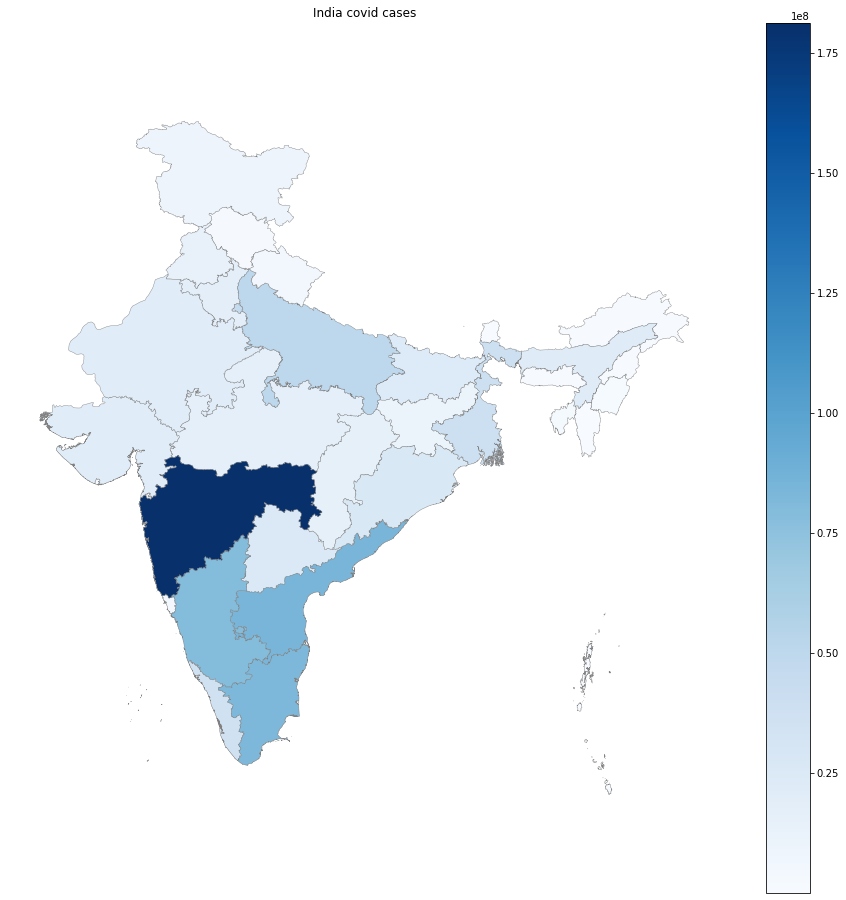

In [602]:


fig, ax = plt.subplots(figsize=(16,16))
India_data = data_grouped.plot(ax=ax, column="Confirmed", cmap="Blues",edgecolor="grey", linewidth=0.4,legend = True)
ax.axis("off")
plt.axis('equal')
plt.title("India covid cases")
plt.show()
#ax.set(xlabel='Total Confirmed Cases in India')
# Add a legend and informative axis label
#plt.legend(ncol=35, loc="right", frameon=True)

In [618]:
fig = px.choropleth(data_grouped, locations="ID_1", geojson = geodata, hover_name = "State/UnionTerritory",
                   color = "Confirmed", hover_data=["Confirmed"])
fig.update_geos(fitbounds ="locations",visible = True)
fig.show()